In [2]:
import torch

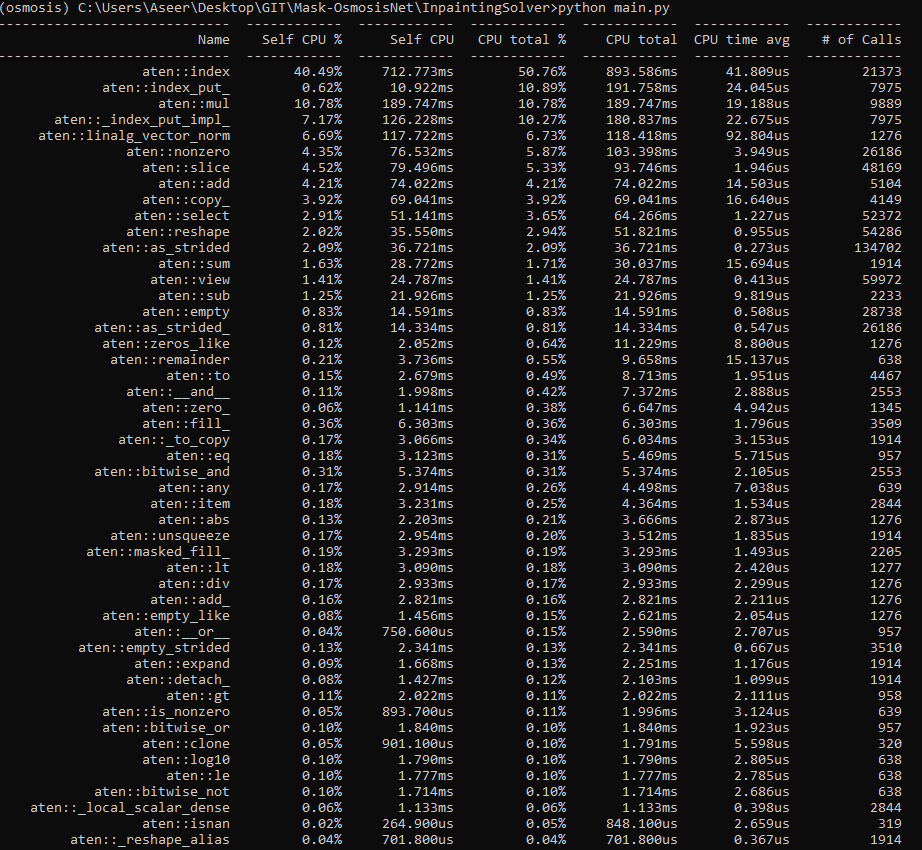

index select backward check

In [14]:
import torch

t = torch.zeros((10, 1, 64, 64), dtype = torch.float64, requires_grad=True)
t = t.clone()
t[:, :, 1:60, 1 :60] = 0
t[:, :, 1:60, 1 :60] = 1


In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
def f_test():
    x = torch.randn((6400, 128, 128), dtype=torch.float32, device =device)
    y = torch.randn((6400, 128, 128), dtype=torch.float32, device =device)

    z = torch.mul(x, y)

def f_test1():
    x = torch.randn((6400, 1, 128, 128), dtype=torch.float32, device =device)
    y = torch.randn((6400, 1, 128, 128), dtype=torch.float32, device =device)

    z = torch.mul(x, y)

def d_test():
    x = torch.randn((6400,1, 128, 128), dtype=torch.float64, device =device)
    y = torch.randn((6400,1, 128, 128), dtype=torch.float64, device =device)

    z = torch.mul(x, y)


def d_test1():
    x = torch.randn((6400, 128, 128), dtype=torch.float64, device =device)
    y = torch.randn((6400, 128, 128), dtype=torch.float64, device =device)

    z = torch.mul(x, y)


In [5]:
import time

st = time.time()
for i in range(1000):
    f_test1()
et = time.time()
print(f"total time : {et-st}")


total time : 4.358606815338135


In [6]:
import time

st = time.time()
for i in range(1000):
    f_test()
et = time.time()
print(f"total time : {et-st}")

total time : 4.353766202926636


In [ ]:
st = time.time()
for i in range(1000):
    f_test()
et = time.time()
print(f"total time : {et-st}")

st = time.time()
for i in range(1000):
    f_test1()
et = time.time()
print(f"total time : {et-st}")


In [1]:
import torch 

x = torch.randn((3,1, 2, 2), dtype=torch.float64)
for i in x:
    print(i.squeeze(0))


tensor([[ 1.4377,  2.4451],
        [-0.4532,  1.8022]], dtype=torch.float64)
tensor([[-0.9816,  1.1198],
        [ 0.1560,  0.6123]], dtype=torch.float64)
tensor([[ 1.2612,  0.7868],
        [-1.0193,  2.4800]], dtype=torch.float64)


Mask slicing vs  torch.where

In [8]:
import torch
import time

# Create a larger tensor for a more noticeable difference
image = torch.arange(1, 10000000)  # Tensor from 1 to 1,000,000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
image = torch.tensor(image, device = device)
# torch.where approach
mask = image > 5000


start_time = time.time()
n_image = torch.where(mask, torch.tensor(10), image)
n_image = torch.where(~mask, torch.tensor(1), image)
n_image = torch.where(mask, torch.tensor(10), image)
end_time = time.time()
print(f"torch.where took: {end_time - start_time:.6f} seconds")

# image = torch.arange(1, 1000001)  # Reset tensor
start_time = time.time()
image[mask] = 10
image[~mask] = 1
image[mask] = 10
end_time = time.time()
print(f"Boolean indexing took: {end_time - start_time:.6f} seconds")


# image = torch.arange(1, 1000001)  # Reset tensor
start_time = time.time()
image = image.clone()
image[mask] = 10
image[~mask] = 1
image[mask] = 10
end_time = time.time()
print(f"Boolean indexing with clone: {end_time - start_time:.6f} seconds")




cpu


/tmp/ipykernel_93447/2585417404.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, device = device)


torch.where took: 0.461090 seconds
Boolean indexing took: 0.067715 seconds


In [23]:
import math
math.log10(8.770187e+04) - math.log10(7.0000e+04) 

0.09791081358009457

In [4]:
import torch

x, y = torch.randn((12, 11)), torch.randn((12, 11), dtype=torch.float64)

pad_mirror = Pad(1, padding_mode = "symmetric")
inp        = pad_mirror(inp[:, :, 1:self.nx+1, 1:self.ny+1])


tensor(-8.8435, dtype=torch.float64)
tensor(-8.8435, dtype=torch.float64)


B, C -> H, W

In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

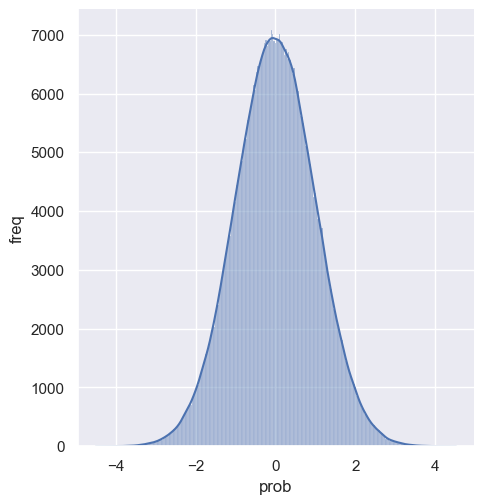

In [2]:

x = torch.randn((32, 1, 128, 128))
y = x.reshape(-1)
counts, bins = torch.histogram(y)

plot = sns.displot(y, kde=True)
fig = plot.figure
plot.set(xlabel='prob', ylabel='freq')
fig.savefig("test.png") 


B, C -> H, W

In [9]:
x = torch.randn((12, 1, 3,4))
B, C, H, W = x.shape

x.view(12*3, 4).shape

torch.Size([36, 4])

stacking images


B, C -> H, W

In [5]:
x = torch.randn((1, 1, 256, 246))
y = torch.randn((1, 1, 256, 246))

z = torch.cat((x, y), dim = 0)
z.shape


torch.Size([2, 1, 256, 246])

Scaling Density

In [27]:
import torch
pre_c = torch.special.expit(torch.randn((1, 1, 21, 20))) # non binary [0,1]
density = torch.sum(pre_c, dim = (2, 3))/(21*20)
c = torch.floor(pre_c + 0.5 ) # binary
density


tensor([[0.5036]])

In [28]:
den = 0.2
c_hat = (den * pre_c) / ( (torch.norm(pre_c, p = 1, dim = (2, 3)).view(1, 1, 1, 1)) / (21*20) + 1e-9)

torch.sum(c_hat, dim = (2, 3))/(21*20)

tensor([[0.2000]])

In [29]:
c = torch.floor(c_hat + 0.5 ) # binary
density = torch.sum(c, dim = (2, 3))/(21*20)
density

tensor([[0.]])

In [12]:
c_hat

tensor([[[[0.1671, 0.0945, 0.1175,  ..., 0.2439, 0.1102, 0.3603],
          [0.3002, 0.1330, 0.2906,  ..., 0.2484, 0.1437, 0.3260],
          [0.0642, 0.1387, 0.2422,  ..., 0.2904, 0.1491, 0.2334],
          ...,
          [0.0470, 0.3572, 0.2343,  ..., 0.2149, 0.1691, 0.2075],
          [0.2102, 0.1402, 0.1963,  ..., 0.3060, 0.1318, 0.1813],
          [0.2577, 0.3188, 0.1973,  ..., 0.2464, 0.1369, 0.2776]],

         [[0.2560, 0.2944, 0.2829,  ..., 0.1436, 0.2973, 0.3630],
          [0.1711, 0.0823, 0.2687,  ..., 0.1957, 0.2335, 0.1281],
          [0.1641, 0.2821, 0.1659,  ..., 0.2409, 0.1260, 0.2215],
          ...,
          [0.1470, 0.1442, 0.0954,  ..., 0.2907, 0.2427, 0.2491],
          [0.3073, 0.2849, 0.2088,  ..., 0.0791, 0.1428, 0.2163],
          [0.2792, 0.1700, 0.0882,  ..., 0.1136, 0.3335, 0.0985]],

         [[0.1018, 0.2539, 0.1401,  ..., 0.1537, 0.0634, 0.3582],
          [0.0443, 0.2977, 0.1358,  ..., 0.2101, 0.2042, 0.2489],
          [0.0562, 0.2468, 0.2242,  ..., 0

In [ ]:
c = (c_hat > ).float()
torch.sum(c)/(21*20)

In [ ]:
x = torch.randn((12, 23, 4, 4))
x = torch.special.expit(x) 

d = 12*23

In [ ]:
torch.mean(torch.abs((torch.norm(x, p = 1, dim = (2, 3)) / d) - 0.6))

In [ ]:
torch.floor(x+0.5)

In [ ]:
x = torch.randn((12, 23, 4, 4))
y = torch.randn((12, 23, 4, 4))
d = 12*23

torch.mean(torch.norm(x-y, p = 2, dim = (2,3))**2 / d)

Scaling Density

In [2]:
import torch

pre_c = torch.special.expit(torch.randn((12, 13, 21, 20))) # non binary [0,1]
b, c, h, w = 12, 13, 21, 20
hw = h*w
densities = torch.norm(pre_c, p = 1, dim = (2, 3)).view(b, c, 1, 1) / (hw)
densities

tensor([[[[0.4937]],

         [[0.5160]],

         [[0.5217]],

         [[0.5060]],

         [[0.4983]],

         [[0.5125]],

         [[0.5144]],

         [[0.5050]],

         [[0.5029]],

         [[0.5087]],

         [[0.4912]],

         [[0.4961]],

         [[0.5105]]],


        [[[0.4884]],

         [[0.4794]],

         [[0.5033]],

         [[0.5089]],

         [[0.4854]],

         [[0.4947]],

         [[0.5068]],

         [[0.5009]],

         [[0.4988]],

         [[0.5076]],

         [[0.5142]],

         [[0.5025]],

         [[0.5066]]],


        [[[0.5075]],

         [[0.4844]],

         [[0.4918]],

         [[0.4975]],

         [[0.5013]],

         [[0.4931]],

         [[0.5216]],

         [[0.4911]],

         [[0.5062]],

         [[0.4934]],

         [[0.4903]],

         [[0.5088]],

         [[0.5154]]],


        [[[0.5043]],

         [[0.5063]],

         [[0.4948]],

         [[0.4911]],

         [[0.4964]],

         [[0.4962]],

    

In [4]:
new_pre_c = torch.where(densities > 0.5, pre_c / densities * 0.5, pre_c)
torch.norm(new_pre_c, p = 1, dim = (2, 3)).view(b, c, 1, 1) / (hw)

tensor([[[[0.4937]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]],

         [[0.4983]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]],

         [[0.4912]],

         [[0.4961]],

         [[0.5000]]],


        [[[0.4884]],

         [[0.4794]],

         [[0.5000]],

         [[0.5000]],

         [[0.4854]],

         [[0.4947]],

         [[0.5000]],

         [[0.5000]],

         [[0.4988]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]]],


        [[[0.5000]],

         [[0.4844]],

         [[0.4918]],

         [[0.4975]],

         [[0.5000]],

         [[0.4931]],

         [[0.5000]],

         [[0.4911]],

         [[0.5000]],

         [[0.4934]],

         [[0.4903]],

         [[0.5000]],

         [[0.5000]]],


        [[[0.5000]],

         [[0.5000]],

         [[0.4948]],

         [[0.4911]],

         [[0.4964]],

         [[0.4962]],

    